<a href="https://colab.research.google.com/github/OugoMartin/Neural-Networks-for-Vision-Tasks/blob/main/Neural_Networks_for_Vision_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PyTorch Autograd**

In [1]:
import torch

# Define tensors with requires_grad=True to track computation
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

# Define an operation
z = x ** 2 + y ** 3

# Compute gradients
z.backward()

# Print gradients
print(f"Gradient of x: {x.grad}")  # Should be 2 * x
print(f"Gradient of y: {y.grad}")  # Should be 3 * y^2

Gradient of x: 4.0
Gradient of y: 27.0


**Load and Preprocess the MNIST Dataset**

100%|██████████| 9.91M/9.91M [00:00<00:00, 39.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.07MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.66MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.36MB/s]


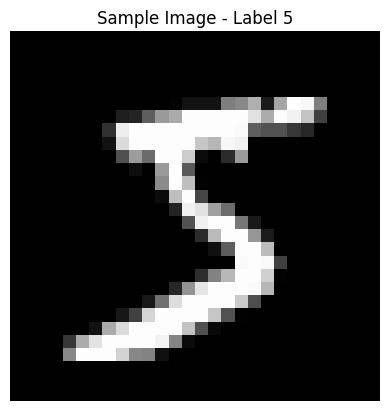

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Display a sample image
image, label = trainset[0]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Sample Image - Label {label}")
plt.axis("off")
plt.show()

**Define and Train a Fully Connected Network**

In [3]:
# Define a simple fully connected network
class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss function, and optimizer
model = FCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(5):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 0.3080
Epoch 2, Loss: 0.2945
Epoch 3, Loss: 0.0403
Epoch 4, Loss: 0.2512
Epoch 5, Loss: 0.0042


**Load and Preprocess the CIFAR-10 Dataset**

In [4]:
# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

100%|██████████| 170M/170M [00:01<00:00, 90.1MB/s]


**Define and Train a CNN**

In [5]:
# Define a simple CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 16 * 16, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 32 * 16 * 16)
        x = self.fc1(x)
        return x

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(5):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 1.5959
Epoch 2, Loss: 1.2860
Epoch 3, Loss: 1.3709
Epoch 4, Loss: 0.5736
Epoch 5, Loss: 1.0885
